# Problem 001: Multiples of 3 or 5
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

**Find the sum of all the multiples of 3 or 5 below 1000.**

## Designing the Solution
This problem is a variant of the famous [FizzBuzz](https://en.wikipedia.org/wiki/Fizz_buzz) number game, which has been used for assessing fundamental coding skills of aspiring programmers.\
Although beeing a relative trivial problem, which can be solved using *conditionals* and and *looping*, there is one caveat: what happens if the number at hand is a multiple of both 3 and 5?

### Iterative Solution
A number *m* is a multiple of a natural number *n* if *n* divides *m* without remainder:
$\frac{m}{n} = 0$.

For an *iterative solution* we will use a `for-loop`, iterating over all natural numbers from 3 up to the limit and checking if this number is a multiple of 3 or 5, using the *modulo* operator `%`.
If so, we add the multiple to a running sum.\
The mentioned difficulty with multiples of both 3 and 5 is handeled via the *logical disjunction* `||` inside the *conditional evaluation* `if`, assuring that the addition is executed only once for every iteration.

In [1]:
function iterativeSum(limit)
    acc = 0
    for m in 3:limit-1
        if m % 3 == 0 || m % 5 == 0
            acc += m
        end
    end
    acc
end

iterativeSum (generic function with 1 method)

We will test every implementation with the `@assert` macro, which simply checks if a given *boolean expression* ist true.
The test case comes from the problem description.\
Let's have a look on how that macro works:

In [2]:
@macroexpand @assert iterativeSum(10) == 23 "iterativeSum returns wrong result"

:(if iterativeSum(10) == 23
      nothing
  else
      Base.throw(Base.AssertionError("iterativeSum returns wrong result"))
  end)

In [3]:
@assert iterativeSum(10) == 23 "iterativeSum returns wrong result"

### Functional Solution
Our *functional solution* will essentially do the same thing as the *iterative solution*, but without an explicit `for-loop` and without the *mutable variable* `acc`.\
This is possible because *julia* provides built-in *higher-order-functions*, which take other functions as their arguments.\
We usually define these parameter-functions, which are passed to other functions, via *anonymous functions*, i.e. function definitions without a name in the form of: `x -> "do something with x"`.

In [4]:
(x -> 2x)(3)

6

For our solution we will use the built-in function `sum` and define the check for multiples via an anonymous function, using the *ternary operator* `? :`.
As this results in a single expression, we are also able to use *short-form definition*:

In [5]:
functionalSum(limit) = sum(m -> (m % 3 == 0 || m % 5 == 0) ? m : 0, 3:limit-1)

functionalSum (generic function with 1 method)

In [6]:
@assert functionalSum(10) == 23

Now that we have two independent solutions, we can expand our tests with checking if both return the same result for a wide range of input values.
This is the reason why I have included the parameter `limit` in our functions, so that we can call the functions with different values.

In [7]:
for m in 100:100:1000
    @show m
    @assert functionalSum(m) == iterativeSum(m)
end

m = 100
m = 200
m = 300
m = 400
m = 500
m = 600
m = 700
m = 800
m = 900
m = 1000


Displaying *m* for every test is helpful to locate and debug errors in case `@assert` does return errors; otherwise it's not necessary.

### Performance
As both solutions have to iterate over all the natural numbers up to the limit, the runtime complexity is linear to the input size $n$, thus $\Theta (n)$.\
Let's check if there's a difference between their running times (we are actually checking against an input size of one million, just to get a meaningful result):

In [8]:
using BenchmarkTools
@benchmark iterativeSum(1_000_000)

BenchmarkTools.Trial: 4439 samples with 1 evaluation.
 Range (min … max):  1.123 ms … 1.429 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.123 ms             ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.125 ms ± 7.833 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █ ▆▃                                                       
  █▄██▆▅▅▅▅▄▄▄▄▅▆▅▃▅▅▄▆▄▄▄▅▄▅▃▄▄▅▅▄▅▅▄▄▄▄▅▄▄▆▄▅▅▅▃▄▃▅▄▄▄▂▅█ █
  1.12 ms     Histogram: log(frequency) by time     1.15 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [9]:
@benchmark functionalSum(1_000_000)

BenchmarkTools.Trial: 6025 samples with 1 evaluation.
 Range (min … max):  827.007 μs … 851.133 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     827.979 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   828.993 μs ±   3.557 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▆█▇▅▄▅▄▁                                                   ▁ ▁
  █████████▇▆▄▅▄▄▄▅▄▄▅▆▅▄▅▅▆▅▄▂▄▅▅▃▅▄▃▅▄▄▅▅▅▄▅▅▅▃▅▅▅▅▅▆▅▅▅▄▅▆██ █
  827 μs        Histogram: log(frequency) by time        846 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

We can see that both solutions don't allocate any memory on the heap, thus the garbage collector is not involved.
That's not a surprise, as the only "objects" involved are simple `Int64` types, which are kept and modified directy in the program's stack.



In [10]:
typeof(iterativeSum(1000))

Int64

But it may come as a surprise that the functional version, while being more compact and expressive, is also faster than the iterative solution.
Consequently, we will prefer functional definitions over iterative ones in the course of this tutorial.

## Optimizing the Solution
The starting point for developing an efficient solution is the following idea:\
instead of checking if the target value is divisible by 3 *or* 5, we can check separately for multiples of 3 *and* 5 and then add the results.

If we apply our iterative implementation for multiples of 3 and 5 we'd get:

$$
\begin{align*}
3 + 6 + 9 + \cdots + 999 &= 3*(1 + 2 + 3 +\cdots + 333) \\
5 + 10 + 15 + \cdots + 995 &= 5*(1 + 2 + 3 + \cdots + 199)
\end{align*}
$$

Thus, we can use the equation for *Triangular Numbers*

$$
T_n = \sum_{k=1}^n k = 1+2+3+\cdots+n = \frac{n(n+1)}{2},
$$

which leads to this implementation:

In [11]:
function triangular(factor, limit)
    n = (limit - 1) / factor
    factor * (n * (n + 1) / 2)
end

triangular (generic function with 1 method)

But when we add the results for factors 3 and 5, we have to subtract the sum for factor 15 (= 3 * 5), as 15 and its multiples are added twice (for both factors 3 and 5). This leads to our new version:

In [12]:
function closedSum(limit)
    triangular(3, limit) + triangular(5, limit) - triangular(15, limit)
end

closedSum (generic function with 1 method)

In [13]:
@assert closedSum(10) == 23 "closedSum returns wrong result"

LoadError: AssertionError: closedSum returns wrong result

We have an error! What happened?\
Let's analyse the result of calling `closedSum`:

In [14]:
closedSum(10)

23.400000000000002

Obviously, the function returned a *real* number, where it should return an *integer*.\
Let's check this again:

In [15]:
typeof(closedSum(10))

Float64

After analyzing our functions, we find that the problem is caused by the function `triangular`, which receives two integer values, but returns a `Float64`:

In [16]:
typeof(triangular(3, 10))

Float64

Again, we analyze that function, this time with help of the `@code_warntype` macro:

In [17]:
@code_warntype triangular(3, 10)

MethodInstance for triangular(::Int64, ::Int64)
  from triangular(factor, limit) @ Main In[11]:1
Arguments
  #self#::Core.Const(triangular)
  factor::Int64
  limit::Int64
Locals
  n::Float64
Body::Float64
1 ─ %1 = (limit - 1)::Int64
│        (n = %1 / factor)
│   %3 = n::Float64
│   %4 = (n + 1)::Float64
│   %5 = (%3 * %4)::Float64
│   %6 = (%5 / 2)::Float64
│   %7 = (factor * %6)::Float64
└──      return %7



Here we see that the local variable `n` gets assigned to a `Float64` value, hence all subsequent calculations produce a `Float64` as well.
And there's the problem: dividing the `limit` by the `factor` with operator `/` produces a `Float64`.\
So all we have to do, is to change that operator into `÷` for integer division.

In [18]:
function triangular(factor, limit)
    n = (limit - 1) ÷ factor
    factor * (n * (n + 1) ÷ 2)
end

@show typeof(triangular(3, 10))
@code_warntype triangular(3, 10)

typeof(triangular(3, 10)) = Int64
MethodInstance for triangular(::Int64, ::Int64)
  from triangular(factor, limit) @ Main In[18]:1
Arguments
  #self#::Core.Const(triangular)
  factor::Int64
  limit::Int64
Locals
  n::Int64
Body::Int64
1 ─ %1 = (limit - 1)::Int64
│        (n = %1 ÷ factor)
│   %3 = n::Int64
│   %4 = (n + 1)::Int64
│   %5 = (%3 * %4)::Int64
│   %6 = (%5 ÷ 2)::Int64
│   %7 = (factor * %6)::Int64
└──      return %7



Now, having resolved that issue, we test again, and everything should be fine:

In [19]:
@assert closedSum(10) == 23 "closedSum returns wrong result"

In [20]:
for m in 100:101:10_000
    @assert closedSum(m) == functionalSum(m) "implementations return different results"
end

### Performance
You might think that calling another function (in our case `triangular`) from the main function `closedSum` will create an overhead, slowing down the computation, but that's not necessarily true:
* firstly, we are calling that function only 3 times, hardly creating any overhead
* secondly, even if `triangular` would be called a million times, the compiler would probably *inline* that function call, avoiding any function-call overhead.

To check if the call of `triangular` gets inlined, we use the macro `@code-typed`:

In [21]:
@code_typed closedSum(100)

CodeInfo(
1 ─ %1  = Base.sub_int(limit, 1)::Int64
│   %2  = Base.checked_sdiv_int(%1, 3)::Int64
│   %3  = Base.add_int(%2, 1)::Int64
│   %4  = Base.mul_int(%2, %3)::Int64
│   %5  = Base.checked_sdiv_int(%4, 2)::Int64
│   %6  = Base.mul_int(3, %5)::Int64
│   %7  = Base.sub_int(limit, 1)::Int64
│   %8  = Base.checked_sdiv_int(%7, 5)::Int64
│   %9  = Base.add_int(%8, 1)::Int64
│   %10 = Base.mul_int(%8, %9)::Int64
│   %11 = Base.checked_sdiv_int(%10, 2)::Int64
│   %12 = Base.mul_int(5, %11)::Int64
│   %13 = Base.add_int(%6, %12)::Int64
│   %14 = Base.sub_int(limit, 1)::Int64
│   %15 = Base.checked_sdiv_int(%14, 15)::Int64
│   %16 = Base.add_int(%15, 1)::Int64
│   %17 = Base.mul_int(%15, %16)::Int64
│   %18 = Base.checked_sdiv_int(%17, 2)::Int64
│   %19 = Base.mul_int(15, %18)::Int64
│   %20 = Base.sub_int(%13, %19)::Int64
└──       return %20
) => Int64

There is no call to the function `triangle` inside `closedSum`: all statements of `triangle` have been inlined into `closedSum`.\
If that hadn't been the case, we could have annotated the function like so: `@inline function triangle(factor, limit)`.

Small functions typically do not need the `@inline` annotation, as the compiler does it automatically. By using `@inline` on bigger functions, an extra nudge can be given to the compiler to inline it.

Nonetheless, we make a last optimization:
we will include the `triangular` function as a local definition in the main procedure `closedSum`, which also eliminates the need for passing the `limit` to that sub-procedure:

In [22]:
function closedSum(limit)
    function triangular(factor)
        n = (limit - 1) ÷ factor
        factor * (n * (n + 1) ÷ 2)
    end
    
    triangular(3) + triangular(5) - triangular(15)
end

closedSum (generic function with 1 method)

In [23]:
@assert closedSum(10) == 23 "closedSum returns wrong result"

In [24]:
for m in 100:101:10_000
    @assert closedSum(m) == functionalSum(m)
end

In [25]:
@benchmark closedSum(1_000_000)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.082 ns … 3.447 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.092 ns             ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.090 ns ± 0.024 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▆    ▁                                             █    ▃ ▁
  █▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁█ █
  1.08 ns     Histogram: log(frequency) by time     1.09 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

Our optimized function is about $10^6$ times faster than the iterative ones!\
We called this version `closedSum` because it represents a *closed formula*, which is independent of it's input size.
So the runtime complexity of this algorithm is constant, thus $\Theta(1)$.

## Mathematical Insights
We are not going to give formal proofs for our programs. Our main goal is to learn *algorithmic problem solving* and some *concrete mathematics* on the way.

But we will try to understand the mathematical concepts used for developing our solutions, including comprehension of proofs for mathematical theorems we have been using.

For this chapter, we will look at the equation for *Triangular Numbers*, since we used it for our optimized solution.

### Triangular Numbers
If you have wondered where the name *Traingular Numbers* comes from, here is an explanation:\
when we choose an arbitrary symbol for the value 1 and stack these symbols on top of each other while adding one extra symbol for each row, we get a graphical representation in the form of an isosceles triangle. For the triangular number $T_{5}$ this would look like so:

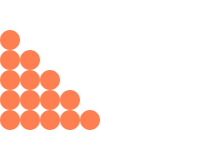

In [26]:
using Luxor

function rows(n, points, r)
    if n > 0
        circle.(points, r, action = :fill)
        translate(Point(0, -2r))
        rows(n-1, points[1:end-1], r)
    end
end

function triangularNumber(n, r)
    points = Point.(zip(r:2r:2n*r, repeat([0], n)))
    rows(n, points, r)
end

Drawing(200, 150, "triangular-mumber.svg")
    translate(Point(0, 120))
    setcolor("coral")
    triangularNumber(5, 10)
    finish()
preview()

Clearly, the number of elements in such a figure is equal to the sum of all natural numbers up to the given limit:
$$
T_n = \sum_{k=1}^n k = 1+2+3+\cdots+n
$$
But how can we efficiently count that number of elements?\
The trick is to copy that triangle, rotate it and paste it to the original one, such that the resulting figure is a rectangle:

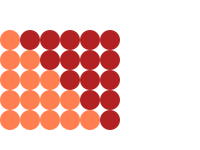

In [27]:
Drawing(200, 150, "rectangular-mumber.svg")
    translate(Point(0, 120))
    setcolor("coral")
    triangularNumber(5, 10)
    rotate(π)
    translate(Point(-120, -20))
    setcolor("firebrick")
    triangularNumber(5, 10)
    finish()
preview()

And we know how to count the number of elements in a rectangle! It's the product of its side lengths: $a*b$.\
Looking at the rectangle above, we see that the number of rows didn't change in respect to the original triangle, so it's `n`.
We can also see that the number of columns increased by 1, so it's `n+1`.
Thus, the number of elements in that rectangle is $n * (n+1)$, and as we have doubled the original triangle, we have to divide that result by 2:

$$
T_n = \sum_{k=1}^n k = \frac{n(n+1)}{2}.
$$

With that, $T_{10} = (10 * 11) / 2 = 110 / 2 = 55$, which you are welcome to check by hand with the triangle above. Or we could check it with another test:

In [28]:
for n in 100:111:10_000
    @assert sum(1:n) == n*(n+1)÷2 "formula for triangular numbers is not correct"
end

The story is told, that *Carl Friedrich Gauß*, a german mathematician of the 18th century, reinvented that formula at the age of nine.
But he didn't use a graphical representation for that, rather an arithmetic sequence.

Retracing that appoach, we write all the summands in one line, and in a second line we write them again, but in reverse order. Finally, we add both lines:

$$
\begin{align*}
T_n &= \quad1 &+ &\quad2 &+ &\quad3 &+ \cdots &+ \quad n\\
T_n &= \quad n &+ &\ (n-1) &+ &\ (n-2) &+ \cdots &+ \quad 1\\
\hline
2T_n &= (n+1) &+ &\ (n+1) &+ &\ (n+1) &+ \cdots &+ (n+1)
\end{align*}
$$

From the third line we conclude that $2T_n = n*(n+1)$, from which follows: $T_n = \frac{n(n+1)}{2}.$

#### Mathematicl Induction
Finally, we will give a formal proof for the formula via **mathematical induction**.

A *proof by induction* consists of two cases.
The first, the ***base case***, proves the statement for $n_0=0$ without assuming any knowledge of other cases.\
The second case, the ***induction step***, proves that if the statement holds for any given case $n = n_0$, then it must also hold for the next case $n = n_0 + 1$.\
These two steps establish that the statement holds for every natural number *n*.
The base case does not necessarily begin with $n_0=0$, but often with $n_0=1$, and possibly with any fixed natural number $n_0 = N$, establishing the truth of the statement for all natural numbers $n ≥ N$.

To recap, our formula to prove is: $T_n = \sum_{k=1}^n k = \frac{n(n+1)}{2}$.

For the *base case* we choose $n_0=1$, which leads to $T_1 = \frac{1(1+1)}{2} = 1$, which is true.

Setting $n=n+1$ leads to the *induction step*
$$
\sum_{k=1}^{n+1}k = \frac{(n+1)(n+2)}{2}.
$$
We now have to show that the left hand side (*lhs*) of the above equation is actually equal to its right hand side (*rhs*). To that goal we transform the *lhs* step by step:

$$
\begin{align*}
lhs &= \sum_{k=1}^{n+1}k = \sum_{k=1}^n k + (n+1)\\
&= \frac{n(n+1)}{2} + (n+1)\\
&= \frac{n(n+1)}{2} + \frac{2(n+1)}{2}\\
&= \frac{n(n+1)+2(n+1)}{2}\\
&= \frac{(n+1)(n+2)}{2} = rhs \blacksquare
\end{align*}
$$

Surprisingly, we're allowed to use the original claim (the formula to prove) inside the *induction step* without leading to a *circular argument*. That's because we have defined a *base case*, which terminates the recurrence.